In [6]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

In [7]:
df_customer_data = pd.read_csv(r"C:\Users\ASUS\Desktop\customer_data.csv")
df_transaction_data = pd.read_csv(r"C:\Users\ASUS\Desktop\transaction_data.csv")
df_customer_data.head()
df_transaction_data.head()

,Customer ID,Transaction Amount,Date,Merchant Name,Category
0,752858,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,115.97,2023-09-20,Steele Inc,Clothing
3,988259,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,62.21,2023-06-13,Palmer-Hinton,Electronics


In [ ]:
# Name ve Surname sutunlari birleshdirib Full_name sutunu yaradin
df_customer_data['Full_name'] = (df_customer_data['Name']+' '+df_customer_data['Surname'])
df_customer_data

In [ ]:
# Birthdate sutununu uch hiseye ayirib Year, Month ve Day sutunlari yaradin
df_customer_data['Birthdate'] = pd.to_datetime(df_customer_data['Birthdate'])
df_customer_data['Year'] =  df_customer_data['Birthdate'].dt.year
df_customer_data['Month'] = df_customer_data['Birthdate'].dt.month
df_customer_data['Day'] = df_customer_data['Birthdate'].dt.day
df_customer_data

In [ ]:
# Month sutununda regemleri ay adlarina deyishin (january, february ve s.)
# pd.cut ile ay numaralarını ay isimlerine dönüştürme
df_customer_data["Month"] = pd.cut(
    df_customer_data["Month"],
    bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    labels=[
        "Yanvar",
        "Fevral",
        "Mart",
        "Aprel",
        "May",
        "Iyun",
        "Iyul",
        "Avgust",
        "Sentyabr",
        "Oktyabr",
        "Noyabr",
        "Dekabr"
    ],
)
df_customer_data

<Axes: xlabel='Birthdate'>

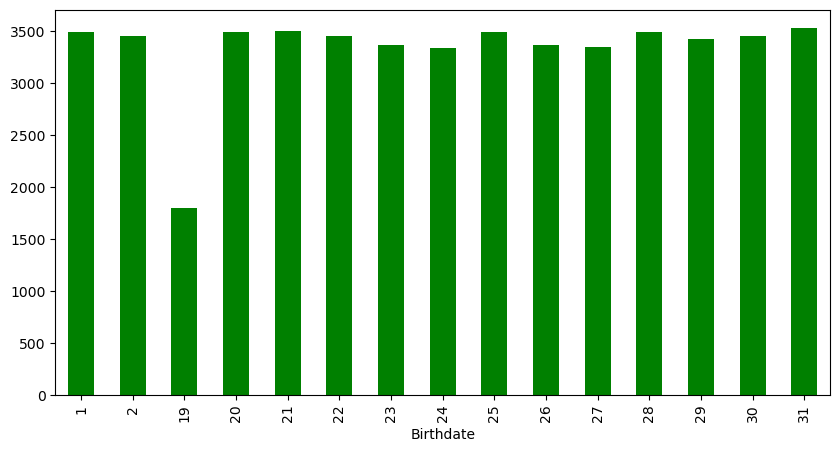

In [37]:
# Ayin gunleri uzre neche neferin doguldugunu gosteren histogram qurun(meselen her ayin biri 5 nefer, her ayin ikisi 10 nefer ve s.)
df_customer_data['Birthdate'].dt.day.value_counts().sort_index().plot(kind='bar', color='green', figsize=(10,5))


In [ ]:
# Hər Category üzrə datasetdə neçə sətir olduğunu və orta Transaction Amount göstərən sütun yaradın
category_counts = df_transaction_data.groupby('Category')['Transaction Amount'].count()   
category_means = df_transaction_data.groupby('Category')['Transaction Amount'].mean()  

 
df_transaction_data['Category_count'] = df_transaction_data['Category'].map(category_counts)
df_transaction_data['Category_avg_Transaction_Amount'] = df_transaction_data['Category'].map(category_means)

df_transaction_data


In [ ]:
# Customer ID sutunu ile iki dataseti birleshtirin
df = pd.merge(df_transaction_data,df_customer_data, on='Customer ID', how='inner')
df

In [77]:
# Clothing Category-asinda en chox emeliyyat eden adami tapin (Full_name)
 
clothing_df = df_transaction_data[df_transaction_data['Category'] == 'Clothing']
umumi_satis = clothing_df.groupby('Merchant Name')['Transaction Amount'].sum()
en_cox = umumi_satis.idxmax()
en_cox

'Johnson PLC'